In [10]:
import joblib
import requests
from io import BytesIO
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
def load_model_from_github_api(url):
    """
    Loads a joblib model from GitHub using the GitHub API.

    Args:
        url (str): API URL of the GitHub repository file.

    Returns:
        model: The loaded model.
    """
    # Send a request to the GitHub URL
    response = requests.get(url, headers={'Accept': 'application/vnd.github.v3.raw'})
    response.raise_for_status()  # Ensure the request was successful

    # Load the model from the response content
    model = joblib.load(BytesIO(response.content))
    return model

# Your file's API URL
url = "https://api.github.com/repos/mehurtado/QuantumProjects/contents/QuantumInspiredTransformers/Modules/revised/linear_regression_model.joblib"
model = load_model_from_github_api(url)

# Now you can use the loaded model
# Example: model.predict(X_test)


In [22]:
def load_data_from_github(url, date_column='Date'):
    """
    Loads data from a GitHub URL.

    Args:
        url (str): Raw GitHub URL to the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the loaded data.
    """
    # Load the data directly from GitHub
    data_df = pd.read_csv(url)
    data_df[date_column] = pd.to_datetime(data_df[date_column])  # Ensure date is in datetime format
    data_df.sort_values(by=date_column, inplace=True)
    return data_df

# Replace with the raw URL of your CSV file
url = "https://raw.githubusercontent.com/mehurtado/QuantumProjects/refs/heads/main/QuantumInspiredTransformers/Modules/revised/AAPL_test_data.csv"
data_df = load_data_from_github(url)

X_test = data_df.iloc[:, :-2].values  # Exclude the last two columns (Target and Date)
y_test = data_df['Target'].values  # Target vector
dates = data_df['Date']  # Date column for plotting


In [23]:
# Check column names to identify the correct date column
print("Column names in the data:", data_df.columns)

Column names in the data: Index(['Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_lag_4',
       'Close_lag_5', 'Close_lag_6', 'Close_lag_7', 'Close_lag_8',
       'Close_lag_9', 'Close_lag_10',
       ...
       'Close_lag_358', 'Close_lag_359', 'Close_lag_360', 'Close_lag_361',
       'Close_lag_362', 'Close_lag_363', 'Close_lag_364', 'Close_lag_365',
       'Target', 'Date'],
      dtype='object', length=367)


In [24]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 16.221992710132927
R^2 Score: 0.9724706867517131


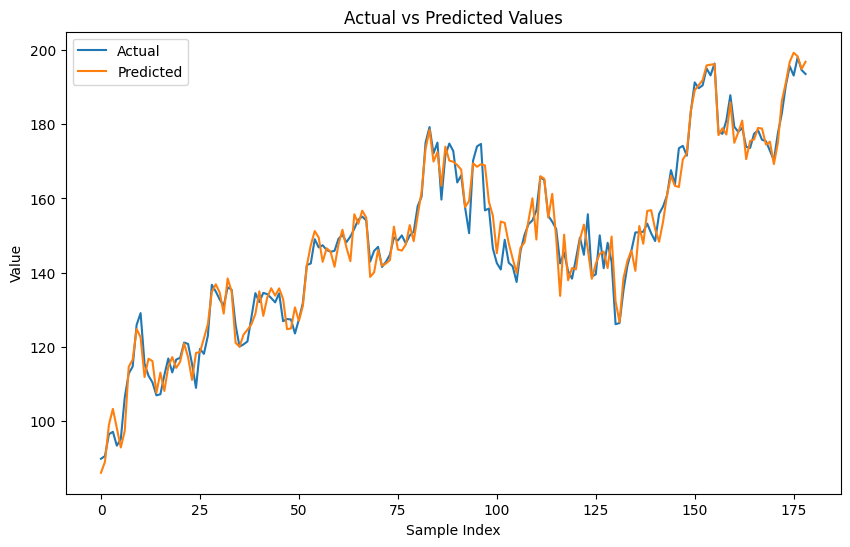

In [27]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', linestyle='-')
plt.plot(y_pred, label='Predicted', linestyle='-')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()